In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la
import network_design as nd

In [2]:
O = np.array([[0,2],[2,0]])
X = np.zeros((8,2))
X[:4,0] = 1
X[4:,1] =1 

In [4]:
cap = {0:{0:0,1:2},1:{0:2,1:0}}

In [77]:
networks = []
counts = {}
for i in range(10000):
    g = nd.new_soup_of_nodes(X,nd.create_capacity(X,cap))
    found = False
    for k,n in enumerate(networks):
        if nx.is_isomorphic(g,n):
            found = True
            counts[k] += 1
            continue
    if found is False:
        counts[len(networks)] = 1
        networks.append(g)
        
            

In [108]:
matrix = []
matrix_counts = {}
for i in range(1000):
    g = nd.new_soup_of_nodes(X,nd.create_capacity(X,cap))
    A = nx.adjacency_matrix(g).toarray()
    found = False
    for k,n in enumerate(matrix):
        if np.allclose(np.linalg.norm(A-n),0):
            found = True
            matrix_counts[k] += 1
            continue
    if found is False:
        matrix_counts[len(matrix)] = 1
        matrix.append(g)

In [109]:
len(matrix)

1000

In [138]:
def draw_two_particle_network(g,X,pos=None,file=None,figsize=(10,10),with_labels=False,directed=False):
    """
    Draw particle network in style of Fig. 1
    
    Parameters:
        g (networkx)
        X (ndarray) - node labels
    """
    fig = plt.figure(figsize=figsize)
    # create weighted graph from M
#     g = nx.Graph()
#     for u,v,data in M.edges(data=True):
#         w = data['weight'] if 'weight' in data else 1.0
#         if g.has_edge(u,v):
#             g[u][v]['weight'] += w
#         else:
#             g.add_edge(u, v, weight=w)
            
    if pos is None:
        pos = nx.spring_layout(g)
        
    
    for edge in g.edges(data='weight'):
        if directed:
            nx.draw_networkx_edges(g,pos=pos,edgelist=[edge],arrowsize=20)
        else:
            nx.draw_networkx_edges(g,pos=pos,edgelist=[edge],width=5)
    
    # Draw particles \theta_1
    nx.draw_networkx_nodes(nx.subgraph(g,set(np.where(X[:,0]==1)[0])),
                       pos=pos,
                       node_color='red',
                       linewidths=1,
                       node_shape='^',
                       edgecolors='w',
                          node_size=1000)
    
    # Draw particles \theta_2
    nx.draw_networkx_nodes(nx.subgraph(g,set(np.where(X[:,1]==1)[0])),
                       pos=pos,
                       node_color='deepskyblue',
                       linewidths=1,
                       node_shape='o',
                       edgecolors='w',node_size=1000)
    
    
    if with_labels:
        nx.draw_networkx_labels(g,pos)
        
    if file != None:
        plt.savefig(file)
    plt.axis('off')


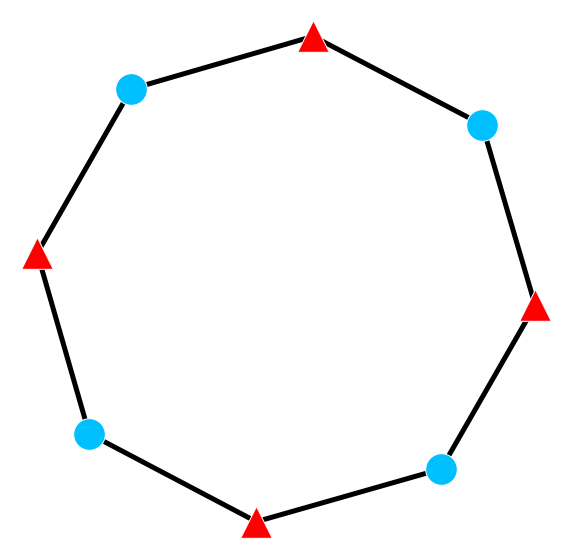

In [142]:
draw_two_particle_network(networks[0],X)
plt.savefig('../figs/drafts/v4/hemoglobin1.png')

In [71]:
211/1000

0.211

In [91]:
canonical_networks = []
canonical_counts = {}
for i in range(10000):
    g = nd.canonical_ensemble([4,4],O,X)
    found = False
    for q,n in enumerate(canonical_networks):
        if nx.is_isomorphic(g,n):
            found = True
            canonical_counts[q] += 1
            continue
    if found is False:
        canonical_counts[len(canonical_networks)] = 1
        canonical_networks.append(g)

In [97]:
np.array(list(canonical_counts.values())).argmax()

np.int64(39)

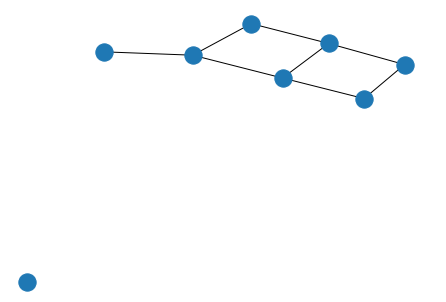

In [98]:
nx.draw(canonical_networks[39])